# Chapter 2. Supervised Learning methods.
# Part 5. Ensemble Tree models.

## - Some datasets

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn

## Forge dataset (artificial)

In [12]:
#taking datasets
X, y = mglearn.datasets.make_forge()
X.shape

/home/akado/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


(26, 2)

Text(0, 0.5, 'Second feature')

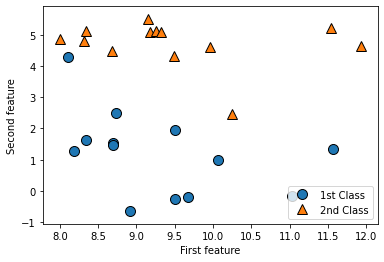

In [13]:
#building plot
#%matplotlib inline #allows to add plots to the browser inteface
mglearn.discrete_scatter(X[:, 0], X[:, 1], y) #plot building

plt.legend(["1st Class", "2nd Class"], loc=4) #legend
plt.xlabel("First feature")
plt.ylabel("Second feature")

## Wave dataset (artificial)

In [14]:
#taking datasets
X, y = mglearn.datasets.make_wave(n_samples =40)
X.shape

(40, 1)

Text(0, 0.5, 'Target value')

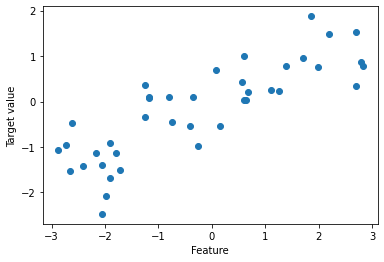

In [15]:
#building plot
plt.plot(X, y, 'o')

plt.xlabel("Feature")
plt.ylabel("Target value")

## Cancer dataset (natural)

In [16]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [17]:
print(cancer.keys())
print(cancer.data.shape)
print(cancer.feature_names)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
(569, 30)
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [18]:
#building a hash table to examine dataset
{n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}

{'malignant': 212, 'benign': 357}

## Boston Housing dataset (natural)

In [19]:
from sklearn.datasets import load_boston
boston = load_boston()

In [20]:
print(boston.keys())
print(boston.data.shape)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
(506, 13)


## Boston Housing extended dataset (natural)

In [21]:
X, y = mglearn.datasets.load_extended_boston()

#104 features are previous 13 default features...
#...plus 91 derivative features
X.shape

(506, 104)

## - Random Forest Analysis

Random forest for 'make_moons' dataset. Trees count: 5

Text(0.5, 1.0, 'Random forest')

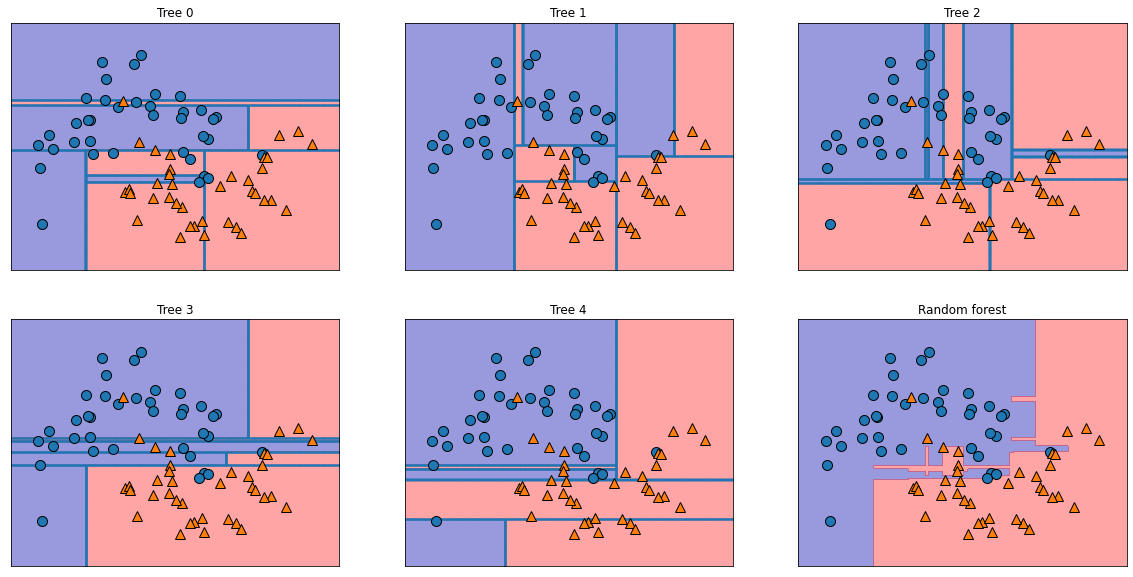

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

#-----loading dataset
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, random_state=42)

#-----model initialization and building
#'n_estimators' is the param to define count of trees in forest
forest = RandomForestClassifier(n_estimators=5, random_state=2).fit(X_train, y_train)

#-----decision tree's borders visualization
#--random forest trees visualization
fig, axes = plt.subplots(2,3, figsize=(20,10))
#'enumerate' function creates tuples out of gain object...
#...as a pairs of index and object element
#'np.ravel()' function transforms multi-dimensional array into...
#...single-dimensional array
#'estimator_' contains built trees in forest
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title('Tree {}'.format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)

#--random forest borders visualization
#areas render
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1,-1], alpha=0.4)
#samples render
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
#title render
axes[-1,-1].set_title('Random forest')

Random forest for breast cancer dataset. Trees count: 100

In [30]:
#loading dataset
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
#model initialization and building
forest = RandomForestClassifier(n_estimators=100, random_state=0).fit(X_train, y_train)
#model validation
print('Train accuracy: {}'.format(forest.score(X_train, y_train)))
print('Test accuracy: {}'.format(forest.score(X_test, y_test)))

Train accuracy: 1.0
Test accuracy: 0.972027972027972


^ High accuracy can be increased even more by adjusting 'max_features' and 'max_depth' params

Feature importance of Random forest:

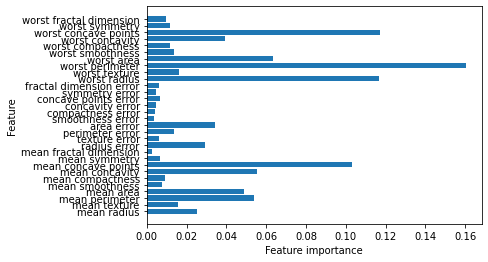

In [33]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')
plot_feature_importances_cancer(forest)

^ Random forest has a wide perception in solving the problem so there were given more importance for more features

Tip: 'n_jobs' param allows to use a given number of processor cores that linearly increases speed of calculations